- 利用 pandas 與 For 迴圈畫出多支股票的走勢圖
- 利用 pandas 合併多支股票資料，並畫圖
- 利用 plt 畫出多支股票的走勢圖，從同一個起點出發

In [57]:
# 引入模組
# datetime 為時間模組

import pandas as pd
import matplotlib.pyplot as plt
import datetime

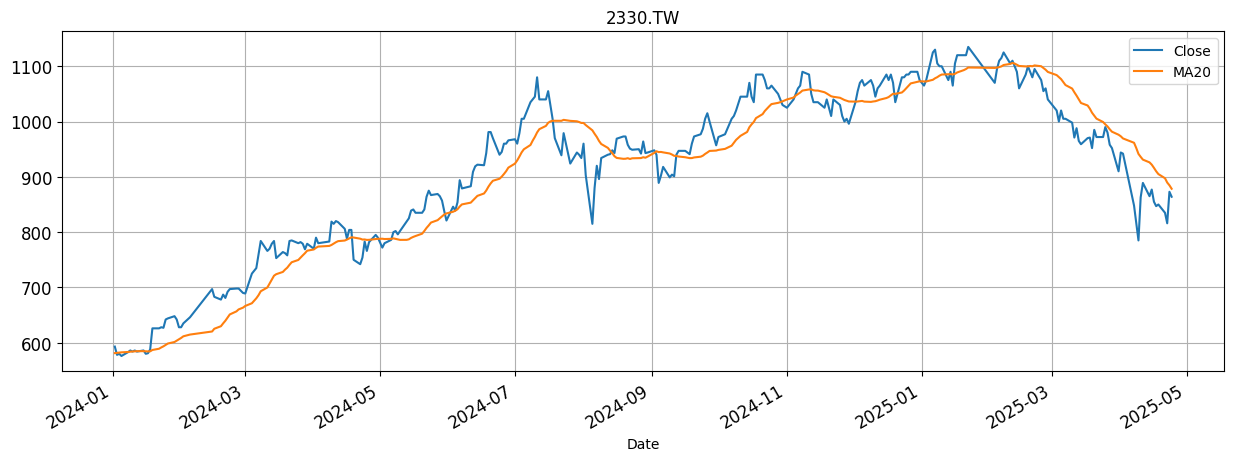

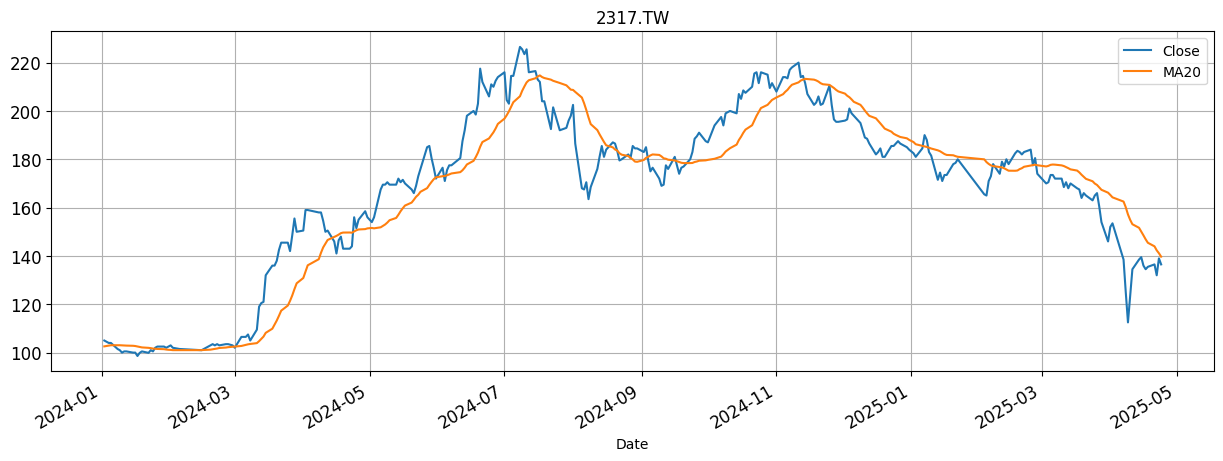

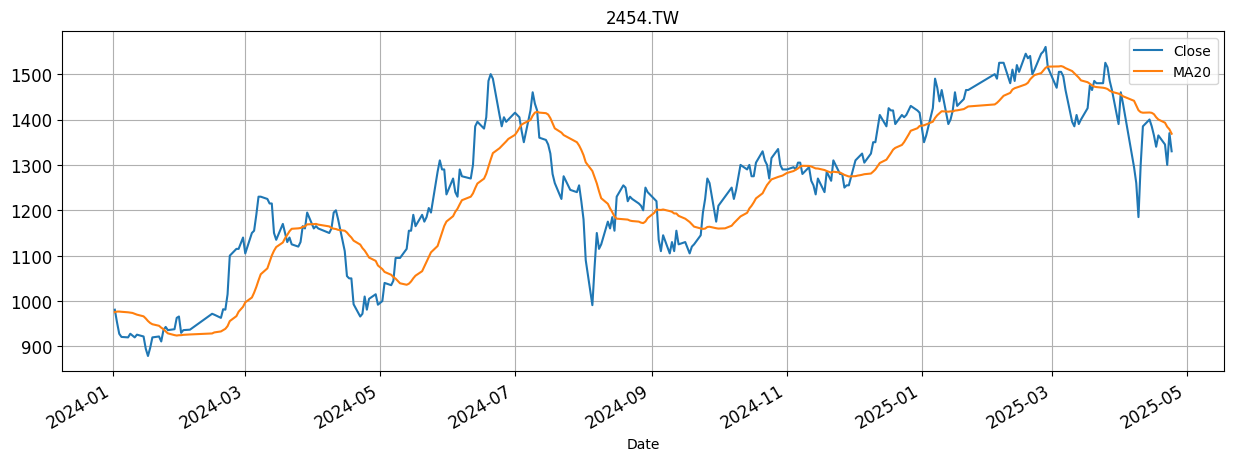

In [58]:
# 利用 For 迴圈輸出多支股票

Symbols = ["2330", "2317", "2454"]

for symbol in Symbols:

    df = pd.read_csv(f"C:\\__STOCK\\DATA\\TWSE\\{symbol}.csv", usecols=["Date", "Close"])
    df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")    # 記得將 index 改為時間格式
    df = df.set_index("Date")

    df["MA20"] = df["Close"].rolling(window=20).mean()
    df = df["2024":"2025"]
    
    df.plot(title=f"{symbol}.TW", figsize=(15, 5), fontsize=12, grid=True)
    plt.show()

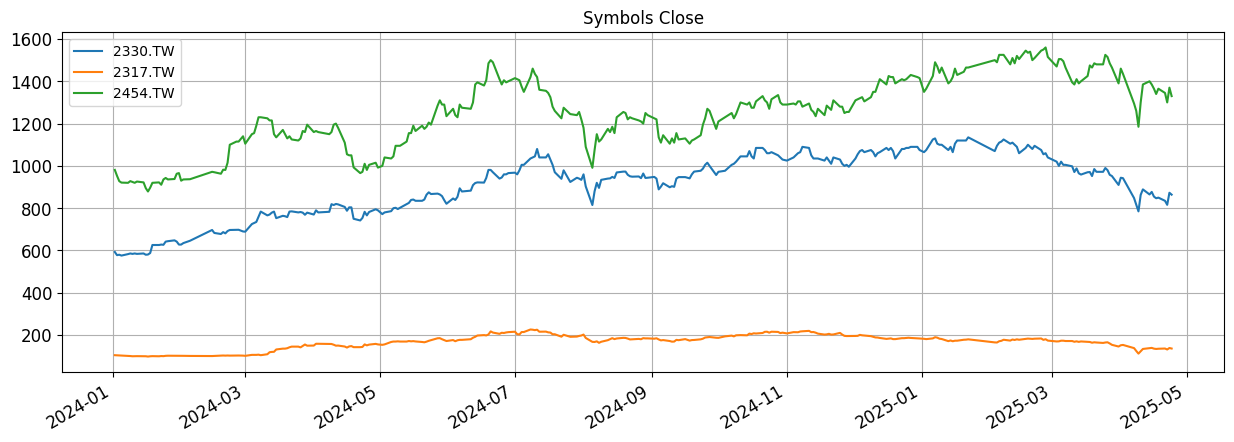

In [59]:
# 合併多支股票資料
# 必須先建立一個 Empty DataFrame
# 畫出多支股票走勢圖

start = datetime.date(2024,1,1)
end = datetime.date.today()
DateRrange = pd.date_range(start, end)

df_Symbols = pd.DataFrame(index=DateRrange)
df_Symbols.index = pd.to_datetime(df_Symbols.index)

Symbols = ["2330", "2317", "2454"]

for symbol in Symbols:

    df = pd.read_csv(f"C:\\__STOCK\\DATA\\TWSE\\{symbol}.csv", usecols=["Date", "Close"])
    df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")    # 記得將 index 改為時間格式
    df = df.set_index("Date")
    df = df.rename(columns={"Close":f"{symbol}.TW"})
    df_Symbols = df_Symbols.join(df).dropna()

df_Symbols.plot(title="Symbols Close", figsize=(15, 5), fontsize=12, grid=True)
plt.show()

- 從上一段 code 中可以發現當個股之間的價格相差過大，會導致低股價的個股看起來沒有任何起伏
- 從上圖也沒辦法比較到底哪一支個股比較強

──────────

- 利用 pandas 讓多支股票從同一個起點開始，並畫圖
- 可以清楚的發現哪支個股比較強勢

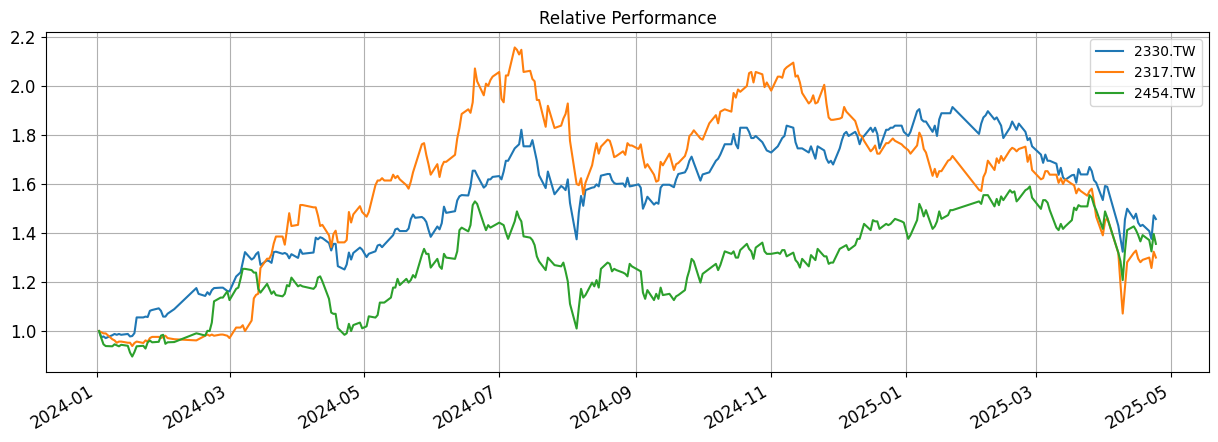

In [60]:
# 讓所有股票都從同一個起跑點開始

df_Normal = df_Symbols / df_Symbols.iloc[0]
df_Normal.plot(title="Relative Performance", figsize=(15, 5), fontsize=12, grid=True)
plt.show()